# UNIT 7 우리 동네 인구 구조 시각화하기
행정안전부에서 제공하는 '연령별 인구 현황 데이터'를 분석해보자.  
- [행정안전부](http://www.mois.go.kr)  
(정책자료 → 통계 → 주민등록 인구 → 통계 → 연령별 인구현황 → 통계표)  
2019년 2월의 데이터를 가져와본 결과 header는 다음과 같은 형태로 되어있다.  
- 행정구역
- 총인구수
- 연령구간인구수
- 0세~100세  
(계O, 남여구분X) → age.csv  
(계X, 남여구분O) → gender.csv

이 데이터에서 신도림의 인구 데이터만 골라서 그래프로 그려보자.

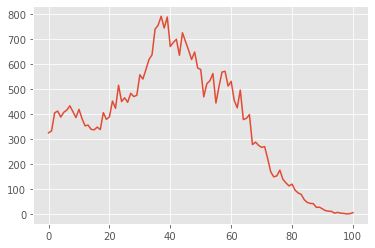

In [3]:
# 신도림동 지역의 인구 구조
import csv
import matplotlib.pyplot as plt
f = open('age.csv')
data = csv.reader(f)
next(data)
result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))
plt.style.use('ggplot')
plt.plot(result)
plt.show()

이러한 그래프를 통해 특정 지역의 특성을 파악할 수 있다.  
ex) 신도림동은 30대 중후반의 사람들이 많고 10세 이하의 아이가 10대 후반 청소년보다 많다.

# UNIT 8 인구 구조를 다양한 형태로 시각화하기  
## 막대그래프  
막대그래프에서 막대의 길이는 각 데이터의 크기를 의미한다.  
```bar(막대를 표시할 위치, 막대의 높이)```  
barh()함수를 이용하면 막대그래프를 수직이 아닌 수평방향으로 그릴 수 있다.

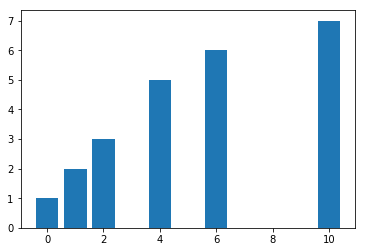

In [5]:
# 막대그래프 그리기
import matplotlib.pyplot as plt
plt.bar([0, 1, 2, 4, 6, 10], [1, 2, 3, 5, 6, 7])
plt.show()

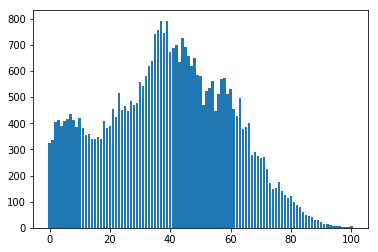

In [6]:
# 신도림동의 인구 데이터를 막대그래프로 나타내기
import csv
f = open('age.csv')
data = csv.reader(f)

result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))

import matplotlib.pyplot as plt
plt.bar(range(101), result)
plt.show()

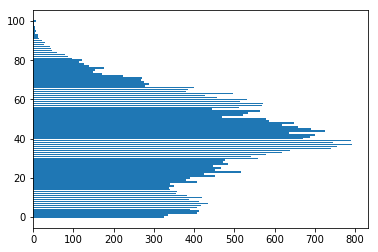

In [7]:
# 신도림동의 인구 데이터를 수평막대그래프로 나타내기
import csv
f = open('age.csv')
data = csv.reader(f)

result = []
for row in data:
    if '신도림' in row[0]:
        for i in row[3:]:
            result.append(int(i))

import matplotlib.pyplot as plt
plt.barh(range(101), result)
plt.show()

## 항아리 모양 그래프